## 정규 표현식
- 나만의 규칙 또는 패턴을 만들 수 있음
- 복잡하고 다양한 문자열 속에서 원하는 문자만 추출하고 원하는 패턴으로 추출할 수 있음
- 문자열 함수로만 풀 수 없는 상황에 이용하여 전처리 또는 추출을 할 수 있음

In [1]:
#정규 포현식 패키지 -> re
# re에는 re.match 또는 search, sub세가지 방법이 존재
import re

In [2]:
# re.match('패턴', 문자열)
re.match('Hello','Hello, world')

<re.Match object; span=(0, 5), match='Hello'>

In [3]:
re.match('ab','ab, Hello world!')

<re.Match object; span=(0, 2), match='ab'>

- 이메일 abcdefg@기업명.net(com) 등등 패턴이 발생
- 패턴을 이용해서 로우데이터에서 이메일을 찾거나 이메일의 형식이 맞는지 체크할 수 있다.

## 매치포인트
- match나 search 등은 매치 오브젝트를 리턴
- 매치된 문자열이나 위치는 매치 오브젝트의 이하의 메소드를 사용하여 취득
- 매치된 위치를 취득 start(), end(), span()
- 매치된 문자열을 취득 group()
- 각 그룹의 문자열을 취득 groups()

In [4]:
s = 'aaa@xxx.com'
m = re.match(r'[a-z]+@[a-z]+\.[a-z]+',s)
print(m)
print(type(m))

<re.Match object; span=(0, 11), match='aaa@xxx.com'>
<class 're.Match'>


In [5]:
print(m.start())
print(m.end())
print(m.span())
print(m.group())

0
11
(0, 11)
aaa@xxx.com


- 매치된 부분의 위치는 start(), end(), span(), 문자열은 group().
- 정규펴현 패턴의 문자열 내의 부분을 괄호로 묶으면, 그 부분이 그룹으로 처리된다.

In [6]:
m = re.match(r'([a-z]+)@([a-z]+)\.([a-z]+)', s)
print(m)

print(m.groups())

<re.Match object; span=(0, 11), match='aaa@xxx.com'>
('aaa', 'xxx', 'com')


## match()
- 문자열의 선두가 패턴에 매치되면 매치 오브젝트를 반환
- 매치된 부분 문자열을 추출 또는 단순히 매치됐는지 아닌지를 체크하는 것이 가능
- 선두에 매치되는 문자열이 없는 경우는 None이 반환

In [7]:
s = 'aaa@xxx.com, bbb@yyy.com, ccc@zzz.net'

m = re.match(r'[a-z]+@[a-z]+\.com', s)
print(m)

m = re.match(r'[a-z]+@[a-z]+\.net', s)
print(m)

<re.Match object; span=(0, 11), match='aaa@xxx.com'>
None


In [9]:
print(re.match('Hello','ab Hello')) #패턴이 선두에 있지 않기 때문에 못찾는다.

None


## search()
- 문자열 모두를 검색 대상으로 하여 앞의 문자열이 아닌 것도 매치
- 매치된 경유 매치 오브젝트가 반환
- 매치될 부분이 여러개인 경우, 처음 매치되는 부분만 리턴

In [14]:
s = 'aaa@xxx.com, bbb@yyy.com, ccc@zzz.net'

m = re.search(r'[a-z]+@[a-z]+\.net', s)
print(m)

m = re.search(r'[a-z]+@[a-z]+\.com', s)
print(m)


<re.Match object; span=(26, 37), match='ccc@zzz.net'>
<re.Match object; span=(0, 11), match='aaa@xxx.com'>


## 패턴을 만들기 위한 여러가지 특수문자
- 숫자패턴의 경우 [0-9], 전체 모든 숫자를 뜻한다.
- 패턴을 확장하기 위해서 사용하는 특수문자
- '*'
- '+'
- 숫자에 대해서 0개 이상 있는지 1개 이상있는지에 따라 모든 숫자를 찾는다.

In [10]:
re.search('[0-9]','12345, hihihi')
# 숫자 데이터만 찾고싶다.
# 1만 찾아준다.

<re.Match object; span=(0, 1), match='1'>

In [12]:
re.search('[0-9]*','12345, hihihi')

<re.Match object; span=(0, 5), match='12345'>

In [13]:
re.search('[0-9]+','12345, hihihi')

<re.Match object; span=(0, 5), match='12345'>

- 문자{개수}
- (문자열){개수}

In [16]:
re.match('a{3}','aaaa32')

<re.Match object; span=(0, 3), match='aaa'>

In [18]:
re.match('a{3}','aa32') #a가 3개보다 적기 떄문에 리턴X

In [19]:
re.match('(hi){5}','hihihihihi1234')

<re.Match object; span=(0, 10), match='hihihihihi'>

In [21]:
re.match('(hi){5}','hihiHihihi1234')

## 전화번호 패턴
- 000-0000-0000의 형태
- 모든숫자(3개)-숫자(4개)-숫자(4개)

In [22]:
re.match('[0-9]{3}-[0-9]{4}-[0-9]{4}','010-4943-148123') #전화번호 위치까지만 리턴

<re.Match object; span=(0, 13), match='010-4943-1481'>

In [24]:
re.match('[0-9]*-[0-9]*-[0-9]*','010-1234-56781') #개수가 아닌 정규표현식 사용시 전화번호 이외에 뒤의 숫자도 리턴

<re.Match object; span=(0, 14), match='010-1234-56781'>

## 문자
- a-z : 모든 알파벳 소문자
- A-Z : 모든 알파벳 대문자
- A-z : 모든 알파벳
- 가-힣 : 모든 한글
- 특수문자의 경우 앞에 \를 붙힌다
- /d : 모든 숫자
- /D : 모든 숫자를 제외
- not [^0-9] : 모든 문자를 제외
- \w [a-zA-Z0-9_] : 영문, 대소문자, 숫자, 밑줄 문자
- \W [^a-zA-Z0-9_] : 위에 \w를 제외한 나머지
- \s or \S : 공백

In [25]:
re.match('[a-z]*','hihi1234')

<re.Match object; span=(0, 4), match='hihi'>

In [26]:
#문자와 숫자 모두 리턴하고 싶은 경우
re.match('[a-z0-9]*','kht123456')

<re.Match object; span=(0, 9), match='kht123456'>

In [27]:
re.search('[가-힣]+','www.python.org/안녕하세요?') #한글의 경우

<re.Match object; span=(15, 20), match='안녕하세요'>

In [28]:
re.search('\?+', '?안녕!')#특수문자의 경우

<re.Match object; span=(0, 1), match='?'>

In [29]:
re.match('[a-zA-Z0-9\s]+', 'hi 12345')

<re.Match object; span=(0, 8), match='hi 12345'>

## 그룹 사용하기
- (정규표현식)(정규표현식)

In [30]:
ab = re.match('([0-9]+) ([a-z]+)','1234 abcd')

In [31]:
ab.group()

'1234 abcd'

In [32]:
ab.group(1)

'1234'

In [33]:
ab.group(2)

'abcd'

## 이메일을 찾는 정규표현식
- 영어 소문자, 숫자만 가능
- 대문자는 불가능
- 문자열로 시작
- @(홈페이지).com으로 끝남
- 홈페이지에는 문자열만
- '[a-z0-9]*@[a-z]*.[a-z]{3}'

In [34]:
'kht1335@naver.com'

'kht1335@naver.com'

In [35]:
re.match('[a-z0-9]*@[a-z]*.[a-z]{3}','kht1335@naver.com')

<re.Match object; span=(0, 17), match='kht1335@naver.com'>

In [36]:
re.search('[a-z]*[0-9]*@[a-z]*.com','python@gmai.com') #net로 끝날 수도 있으므로 위의 방법 추천

<re.Match object; span=(0, 15), match='python@gmai.com'>

## 텍스트 분석
- 문자열, 텍스트에 대한 데이터 분석
- 문자는 컴퓨터가 계산을 못하므로 수치화해야한다.
- 카운팅기반 또는 빈도에 대해 수치화
- 원핫인코딩, 레이블인코딩, 인코딩 등을 진행해서 문자를 수치화
- 영어, 한국어 konlp 를 이용해서 형태소처리 할 수 있다.
- 영어 nltk, okt, twitter 다양하다.
- 자연어 처리 토큰화 모듈
- 자연어처리 토큰화 모듈
- From nltk.tokenize import sent_tokenize
- From konlpy.tag import Hannaum
- From knolpy.tag import Kkma
- From konlpy.tag import Okt
- from konlpy.tag import Mecab

In [2]:
import pandas as pd
survey = pd.read_csv('../BDA/CSV/survey_설문지.csv')

In [3]:
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [4]:
#정규식을 가지고 영어는 제외하고 한글만 모두 남긴다.
survey['comment']

0            역앞에 젊은이들이 모여있다(AA역)
1          운동할 수 있는 장소가 있는 것이 좋다
2                      육아 지원이 좋다
3     어린이집에 바로 입원할 수 있다(대기아동 없음)
4                    역앞 상가가 쓸쓸하다
                 ...            
81        초등학교 운동장이 잔디밭이라서 아주 좋다
82    홈페이지에서도 설문지를 투고할 수 있게 해 달라
83               공원에 놀이기구가 너무 적다
84                공원을 더 늘렸으면 좋겠다
85             역앞에 주차장이 적다, 불편하다
Name: comment, Length: 86, dtype: object

## str문법을 사용해서 전처리 진행
- str은 기본적으로 다양한 문자열 처리를 할 수 있는 함수가 있다.
- replace, contain 등 다양

In [6]:
survey['comment'] = survey['comment'].str.replace('[A-Za-z]',"",regex=True)
# comment컬럼의 영문자들을 제거
# regex 는 정규식 표현을 사용하겠다는 의미

In [7]:
survey['comment']

0              역앞에 젊은이들이 모여있다(역)
1          운동할 수 있는 장소가 있는 것이 좋다
2                      육아 지원이 좋다
3     어린이집에 바로 입원할 수 있다(대기아동 없음)
4                    역앞 상가가 쓸쓸하다
                 ...            
81        초등학교 운동장이 잔디밭이라서 아주 좋다
82    홈페이지에서도 설문지를 투고할 수 있게 해 달라
83               공원에 놀이기구가 너무 적다
84                공원을 더 늘렸으면 좋겠다
85             역앞에 주차장이 적다, 불편하다
Name: comment, Length: 86, dtype: object

In [8]:
survey['len'] = survey['comment'].str.len() #리뷰에 대한 길이 컬럼 생성

In [9]:
survey

,datetime,comment,satisfaction,len
0,2019-03-11,역앞에 젊은이들이 모여있다(역),1,17.0
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21.0
2,2019-02-18,육아 지원이 좋다,5,9.0
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4,26.0
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11.0
...,...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5,22.0
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2,26.0
83,2019-01-09,공원에 놀이기구가 너무 적다,1,15.0
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2,14.0


In [10]:
import matplotlib.pyplot as plt

(array([19., 19., 20., 11.,  7.,  3.,  4.,  0.,  0.,  1.]),
 array([ 6. , 11.6, 17.2, 22.8, 28.4, 34. , 39.6, 45.2, 50.8, 56.4, 62. ]),
 <BarContainer object of 10 artists>)

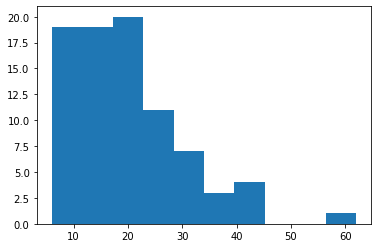

In [12]:
plt.hist(survey['len']) #리뷰의 길이에 대해 히스토그램으로 확인